<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span><ul class="toc-item"><li><span><a href="#Prepare" data-toc-modified-id="Prepare-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prepare</a></span></li><li><span><a href="#Core" data-toc-modified-id="Core-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Core</a></span></li><li><span><a href="#Feature-importances" data-toc-modified-id="Feature-importances-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature importances</a></span></li></ul></li></ul></div>

In [1]:
import taiko as tk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
import lightgbm as lgb
from sklearn import metrics

SONG = 1
WHO = 6
TRAIN_ORDER = 3

Using TensorFlow backend.


In [2]:
pfs = []
for drummer in range(WHO, WHO + 1):
    ppf = []
    for order_id in tqdm(range(1, 3 + 1)):
        ppf.append(tk.get_event_primitive_df(drummer, SONG, order_id))
    pfs.append(ppf)

100%|██████████| 3/3 [00:00<00:00, 46.71it/s]


In [3]:
train_df = pfs[0][2]
train_df

,hit_type,R_A_AI,R_G_AI,R_AX_AI,R_AY_AI,R_AZ_AI,R_GX_AI,R_GY_AI,R_GZ_AI,R_A_VI,...,L_AXY_CORR,L_AYZ_CORR,L_AZX_CORR,L_GXY_CORR,L_GYZ_CORR,L_GZX_CORR,L1,L2,R1,R2
0,1,0.295000,1.46600,0.406700,-0.125000,-0.636900,-0.38690,-1.879000,-0.618800,0.27280,...,0.5165,0.004356,-0.113400,-0.738100,-0.85000,0.72260,0,0,0,0
1,0,-0.472900,0.78520,-1.068000,-0.544200,-0.647300,-2.35400,0.508900,-3.195000,-0.42980,...,0.8524,0.596500,0.381200,-0.906200,-0.92220,0.98320,1,0,0,0
2,0,0.707200,1.44500,2.323000,-0.155300,-1.976000,1.54800,0.518900,2.692000,-0.23090,...,0.8325,-0.306500,-0.015410,-0.640500,-0.63060,0.92550,0,1,0,1
3,0,-0.613900,1.28700,-1.259000,0.188800,0.439800,1.42600,1.713000,0.884500,-0.46010,...,0.7836,-0.740600,-0.265200,-0.952500,-0.98630,0.96150,0,0,1,0
4,1,1.017000,-0.42900,0.305800,0.441400,0.649000,-0.99470,-0.712400,-1.381000,1.57000,...,-0.9070,-0.822700,0.894600,0.115200,0.28690,0.98240,0,0,0,0
5,0,-0.484600,-0.98260,-0.056230,-0.942700,-0.167400,-1.17100,-0.785200,-0.852200,-0.23830,...,-0.7135,-0.639100,0.885500,-0.000615,-0.39940,0.78670,1,0,0,0
6,0,0.182100,0.25250,1.362000,0.318100,-1.106000,0.21450,-0.105600,0.455200,0.06870,...,0.1452,-0.855500,-0.011840,-0.854400,-0.95240,0.96520,0,1,0,1
7,0,-0.618400,1.38500,-0.310900,-0.254100,0.310000,1.80900,1.349000,1.861000,-0.43840,...,0.2227,-0.572000,0.645500,-0.579800,-0.65370,0.97160,0,0,1,0
8,1,1.104000,-0.08109,0.318000,0.904000,1.451000,-1.35400,-2.436000,-0.391500,0.15410,...,0.5542,-0.395900,0.114000,-0.394500,-0.17010,0.95800,0,0,0,1
9,0,0.562300,0.72730,1.439000,-1.189000,-1.693000,-0.31770,1.539000,0.060900,-0.42440,...,-0.8791,-0.061790,-0.293100,0.051070,0.53330,0.12530,1,0,1,0


# LGBM training

## Prepare

In [4]:
x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']


x_valid_1 = pfs[0][0].drop(['hit_type'], axis=1)
y_valid_1 = pfs[0][0]['hit_type']

x_valid_2 = pfs[0][1].drop(['hit_type'], axis=1)
y_valid_2 = pfs[0][1]['hit_type']

x_test_1 = x_valid_1.copy()
x_test_2 = x_valid_2.copy()

train_df

,hit_type,R_A_AI,R_G_AI,R_AX_AI,R_AY_AI,R_AZ_AI,R_GX_AI,R_GY_AI,R_GZ_AI,R_A_VI,...,L_AXY_CORR,L_AYZ_CORR,L_AZX_CORR,L_GXY_CORR,L_GYZ_CORR,L_GZX_CORR,L1,L2,R1,R2
0,1,0.295000,1.46600,0.406700,-0.125000,-0.636900,-0.38690,-1.879000,-0.618800,0.27280,...,0.5165,0.004356,-0.113400,-0.738100,-0.85000,0.72260,0,0,0,0
1,0,-0.472900,0.78520,-1.068000,-0.544200,-0.647300,-2.35400,0.508900,-3.195000,-0.42980,...,0.8524,0.596500,0.381200,-0.906200,-0.92220,0.98320,1,0,0,0
2,0,0.707200,1.44500,2.323000,-0.155300,-1.976000,1.54800,0.518900,2.692000,-0.23090,...,0.8325,-0.306500,-0.015410,-0.640500,-0.63060,0.92550,0,1,0,1
3,0,-0.613900,1.28700,-1.259000,0.188800,0.439800,1.42600,1.713000,0.884500,-0.46010,...,0.7836,-0.740600,-0.265200,-0.952500,-0.98630,0.96150,0,0,1,0
4,1,1.017000,-0.42900,0.305800,0.441400,0.649000,-0.99470,-0.712400,-1.381000,1.57000,...,-0.9070,-0.822700,0.894600,0.115200,0.28690,0.98240,0,0,0,0
5,0,-0.484600,-0.98260,-0.056230,-0.942700,-0.167400,-1.17100,-0.785200,-0.852200,-0.23830,...,-0.7135,-0.639100,0.885500,-0.000615,-0.39940,0.78670,1,0,0,0
6,0,0.182100,0.25250,1.362000,0.318100,-1.106000,0.21450,-0.105600,0.455200,0.06870,...,0.1452,-0.855500,-0.011840,-0.854400,-0.95240,0.96520,0,1,0,1
7,0,-0.618400,1.38500,-0.310900,-0.254100,0.310000,1.80900,1.349000,1.861000,-0.43840,...,0.2227,-0.572000,0.645500,-0.579800,-0.65370,0.97160,0,0,1,0
8,1,1.104000,-0.08109,0.318000,0.904000,1.451000,-1.35400,-2.436000,-0.391500,0.15410,...,0.5542,-0.395900,0.114000,-0.394500,-0.17010,0.95800,0,0,0,1
9,0,0.562300,0.72730,1.439000,-1.189000,-1.693000,-0.31770,1.539000,0.060900,-0.42440,...,-0.8791,-0.061790,-0.293100,0.051070,0.53330,0.12530,1,0,1,0


In [5]:
def my_f1_score(y_pred, y):

    y = y.get_label()
    y_pred = y_pred.reshape(len(np.unique(y)), -1).argmax(axis=0)
    return "f1-score", metrics.f1_score(y, y_pred, average="weighted"), True

## Core

In [6]:
train_set = lgb.Dataset(x, y)
valid_1_set = lgb.Dataset(x_valid_1, y_valid_1, free_raw_data=False)
valid_2_set = lgb.Dataset(x_valid_2, y_valid_2, free_raw_data=False)
watchlist = [valid_1_set]

params = dict({
    'learning_rate': 0.1,
    'application': 'multiclass',
    'num_classes': 3,
#     'min_data_in_leaf': 3,
    'max_depth': 7,
    'num_leaves': 2 ** 10,
    'verbosity': 0
#     'metric': 'multi_logloss'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=200, verbose_eval=5, early_stopping_rounds=100, feval=my_f1_score)
# y_pred_1 = model.predict(x_test_1, num_iteration=model.best_iteration)
y_pred_2 = model.predict(x_test_2, num_iteration=model.best_iteration)

watchlist = [valid_2_set]
model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=200, verbose_eval=5, early_stopping_rounds=100, feval=my_f1_score)
y_pred_1 = model.predict(x_test_1, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's f1-score: 0.883155
[10]	valid_0's f1-score: 0.887014
[15]	valid_0's f1-score: 0.904338
[20]	valid_0's f1-score: 0.909995
[25]	valid_0's f1-score: 0.918091
[30]	valid_0's f1-score: 0.929596
[35]	valid_0's f1-score: 0.935395
[40]	valid_0's f1-score: 0.94392
[45]	valid_0's f1-score: 0.949652
[50]	valid_0's f1-score: 0.9524
[55]	valid_0's f1-score: 0.955247
[60]	valid_0's f1-score: 0.955247
[65]	valid_0's f1-score: 0.955247
[70]	valid_0's f1-score: 0.958082
[75]	valid_0's f1-score: 0.960903
[80]	valid_0's f1-score: 0.955247
[85]	valid_0's f1-score: 0.958082
[90]	valid_0's f1-score: 0.960903
[95]	valid_0's f1-score: 0.963712
[100]	valid_0's f1-score: 0.963712
[105]	valid_0's f1-score: 0.960903
[110]	valid_0's f1-score: 0.960903
[115]	valid_0's f1-score: 0.960903
[120]	valid_0's f1-score: 0.960903
[125]	valid_0's f1-score: 0.960903
[130]	valid_0's f1-score: 0.963712
[135]	valid_0's f1-score: 0.963712
[140]	valid_0's

## Feature importances

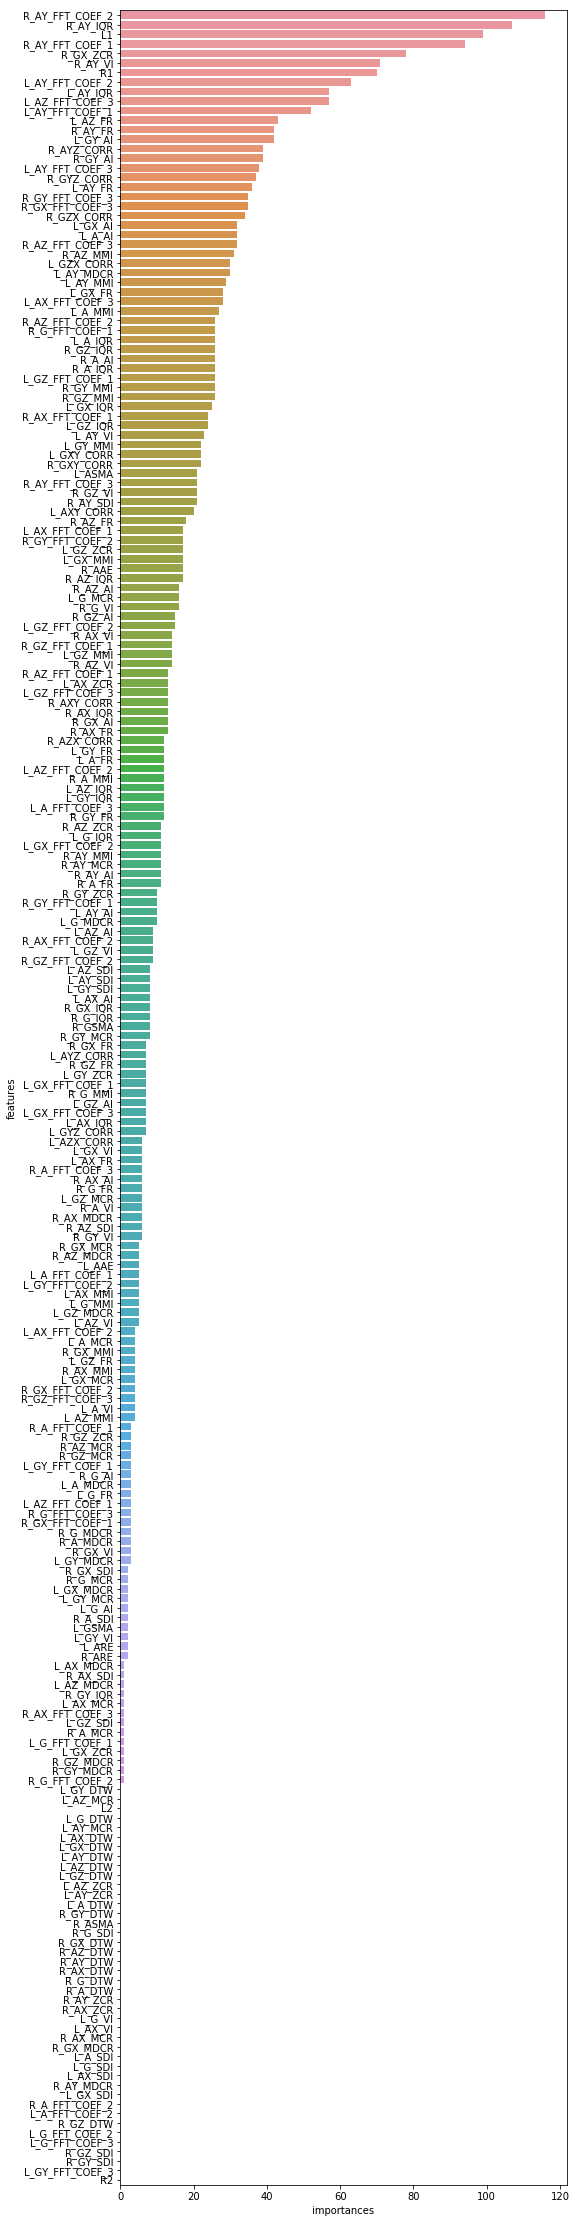

In [7]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 40))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [8]:
y_test = []
for y_pred in [y_pred_1, y_pred_2]:
    predictions = []
    for x in y_pred:
        predictions.append(np.argmax(x))
    y_test.append(pd.Series(data=predictions))

In [9]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

Normalized confusion matrix
[[0.98367347 0.00816327 0.00816327]
 [0.08139535 0.91860465 0.        ]
 [0.13333333 0.         0.86666667]]


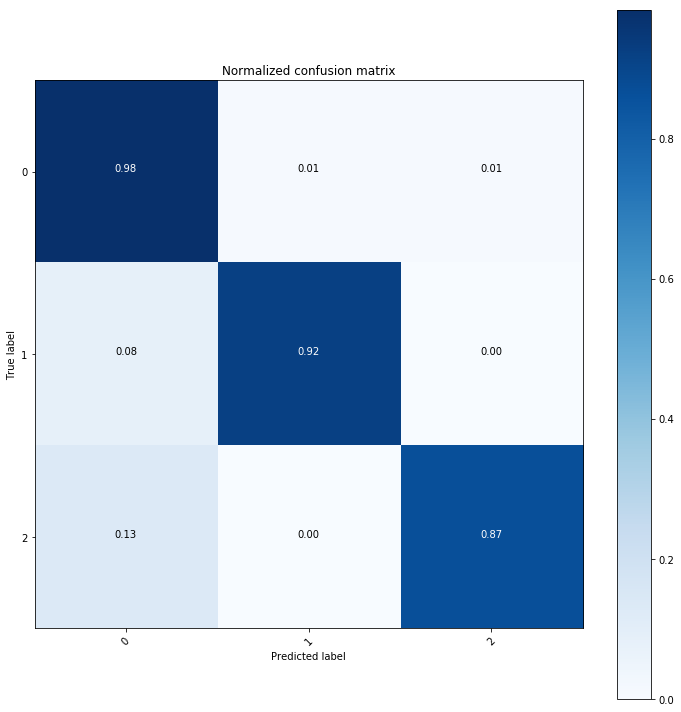

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       245
          1       0.98      0.92      0.95        86
          2       0.93      0.87      0.90        30

avg / total       0.96      0.96      0.96       361

0.9588159141605744
Normalized confusion matrix
[[0.97959184 0.0122449  0.00816327]
 [0.08139535 0.91860465 0.        ]
 [0.1        0.         0.9       ]]


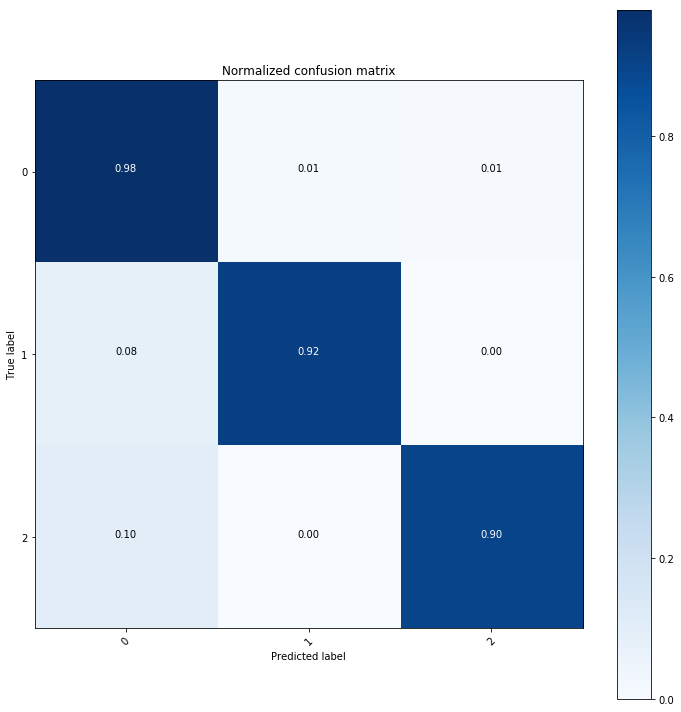

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       245
          1       0.96      0.92      0.94        86
          2       0.93      0.90      0.92        30

avg / total       0.96      0.96      0.96       361

0.958686046882676


In [11]:
y_valid = [y_valid_1, y_valid_2]
for y_val, y_tst in zip(y_valid, y_test):
    cutstom_output_cnf_matrix(y_val, y_tst)
    print(metrics.classification_report(y_val, y_tst))
    
    print(metrics.f1_score(y_tst, y_val, average = 'weighted'))